In [3]:
using Test
using OffsetArrays
using Plots
include("../src/ladderDGA_core.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

gen_synth (generic function with 1 method)

In [30]:
Nf = 2
Nb = 2
Nν_shell = 2
Nν_full = 2*Nf+2*Nν_shell

shift = 0
gi, χ₀, χsp, χch, χsp_a, χch_a, χpp_a, U, β, shift = 
    gen_synth(Nf, Nb, Nν_shell, shift)
I_core, I_corner, I_top, I_side = shell_indices(Nν_full, Nν_shell)
ωi = 3
n_iω = trunc(Int, size(χsp,3)/2)
n_iν = trunc(Int, Nν_full/2);

In [32]:
I_core, I_corner, I_t, I_r = shell_indices(Nν_full, Nν_shell)
I_all = sort(union(I_core, I_corner, I_r, I_t))
I_aympt = sort(union(I_corner, I_r,  I_t))

Fsp = zeros(eltype(χsp), Nν_full, Nν_full)
Fch = zeros(eltype(χsp), Nν_full, Nν_full)
λsp = Array{eltype(χsp), 1}(undef, Nν_full)
λch = similar(λsp)
ωi = 3
ω_off = shift*trunc(Int,(ωi-n_iω-1)/2)
ind1_list_corner, ind2_list_corner = aux_indices(I_corner, ωi, n_iω, n_iν, shift)
ind1_list_r, ind2_list_r = aux_indices(I_r, ωi, n_iω, n_iν, shift)
ind1_list_t, ind2_list_t = aux_indices(I_t, ωi, n_iω, n_iν, shift)

for i in I_all
    δ_ννp = Float64(i[1] == i[2])
    Fsp[i] = - β^2 * (χsp[i,ωi] - δ_ννp*χ₀[i[1],ωi])/(χ₀[i[1],ωi]*χ₀[i[2],ωi])
    #println("$i : ($(χsp[i,ωi]) - $(δ_ννp) * $(χ₀[i[1],ωi]))/($(χ₀[i[1],ωi]) * $(χ₀[i[2],ωi]))" )
end
println("--------")
χsp_n = update_χ!(λsp, view(χsp,:,:,ωi), Fsp, view(χ₀,:,ωi), β, I_aympt)
update_Fsp!(Fsp, λsp, χsp_n, χch_a, χsp_a, χpp_a, U, I_corner, I_r, I_t, ind1_list_corner, ind2_list_corner, 
            ind1_list_r, ind2_list_r, ind1_list_t, ind2_list_t)

--------


In [5]:
χsp[:,:,1]

8×8 Matrix{Float64}:
  1.0  18.0  34.0  50.0  66.0  82.0   98.0  114.0
  4.0  10.0  36.0  52.0  68.0  84.0  100.0  116.0
  6.0  22.0  19.0  27.0  35.0  43.0  102.0  118.0
  8.0  24.0  20.0  28.0  36.0  44.0  104.0  120.0
 10.0  26.0  21.0  29.0  37.0  45.0  106.0  122.0
 12.0  28.0  22.0  30.0  38.0  46.0  108.0  124.0
 14.0  30.0  46.0  62.0  78.0  94.0   55.0  126.0
 16.0  32.0  48.0  64.0  80.0  96.0  112.0   64.0

In [6]:
update_Fsp!(Fsp, λsp, χsp_n, χch_a, χsp_a, χpp_a, U, I_corner, I_r, I_t, ind1_list_corner, ind2_list_corner, 
            ind1_list_r, ind2_list_r, ind1_list_t, ind2_list_t)
χsp_n = update_χ!(λsp, view(χsp,:,:,ωi), Fsp, view(χ₀,:,ωi), β, I_aympt)

-4.385209882e10

In [1]:
include("../test/test_s0.jl")

(240, 41)
(240, 240, 41)
21

2.0503925348748933, 0.3660929179310241
2.17186311396492, 0.34572337557818433
2.2968968923428696, 0.32594282008374126
2.425634530756471, 0.30671045179630835
shifted: 
(500, 301)
(500, 500, 301)
151

2.184540032317881, 0.34857035547373383
2.1928063732949696, 0.3472568126769596
2.201088283318113, 0.3459457912914083
2.2093858628550227, 0.34463724004272195


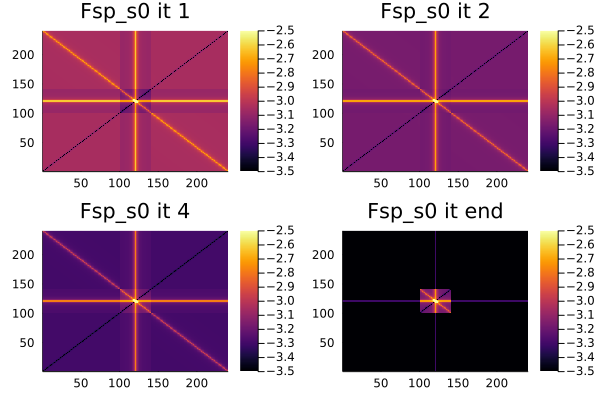

In [2]:
clim = (-3.5,-2.5)
p1 = heatmap(real.(Fsp_s0[2]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_s0[3]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_s0[4]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_s0[10]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

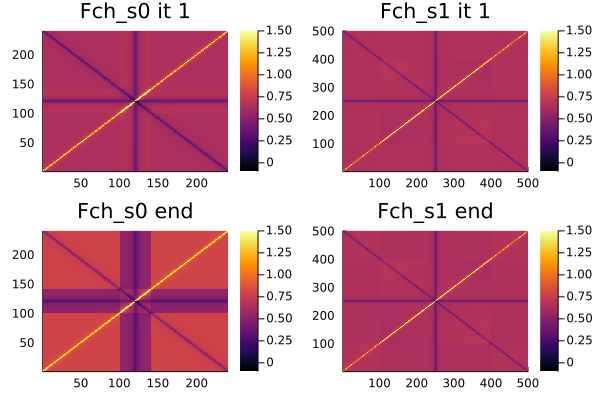

In [3]:
clim = (-0.1,1.5)
p11 = heatmap(real.(Fch_s0[2]), title="Fch_s0 it 1", clim=clim)
p21 = heatmap(real.(Fch_s1[2]), title="Fch_s1 it 1",clim=clim)
p31 = heatmap(real.(Fch_s0[end]), title="Fch_s0 end",clim=clim)
p41 = heatmap(real.(Fch_s1[end]), title="Fch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

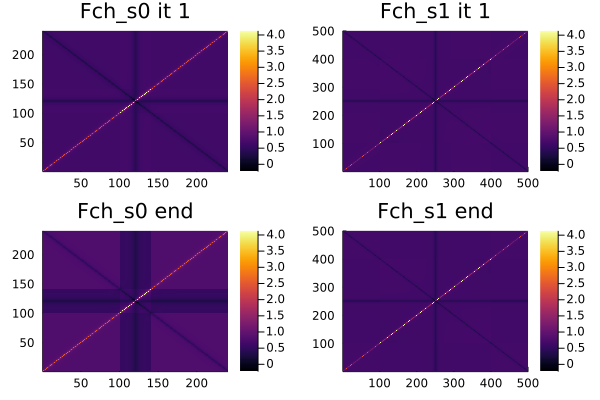

In [4]:
clim = (-0.1,0.1)
p11 = heatmap(real.(Fch_s0[2]), title="Fch_s0 it 1")
p21 = heatmap(real.(Fch_s1[2]), title="Fch_s1 it 1")
p31 = heatmap(real.(Fch_s0[end]), title="Fch_s0 end")
p41 = heatmap(real.(Fch_s1[end]), title="Fch_s1 end")
plot(p11,p21,p31,p41, layout = (2, 2))

In [9]:
imp_dens_s0 = 0.5*sum(real.(χDMFTsp_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTsp_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTsp_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTsp_impr_s1+χDMFTch_impr_s1))/β_s1^3
Ssp_impr_s0 = sum(χDMFTsp_impr_s0[:,:,21])
Ssp_naive_s0 = sum( χDMFTsp_s0[:,:,21])
Ssp_true_s0 = χ_sp_asympt_s0[1]
Sch_impr_s0 = sum( χDMFTch_impr_s0[:,:,21])
Sch_naive_s0 = sum( χDMFTch_s0[:,:,21])
Sch_true_s0 = χ_ch_asympt_s0[1]
Ssp_impr_s1 = sum( χDMFTsp_impr_s1[:,:,151])
Ssp_naive_s1 = sum( χDMFTsp_s1[:,:,151])
Ssp_true_s1 = χ_sp_asympt_s1[1]
Sch_impr_s1 = sum( χDMFTch_impr_s1[:,:,151])
Sch_naive_s1 = sum( χDMFTch_s1[:,:,151])
Sch_true_s1 = χ_ch_asympt_s1[1]
println("                     s0 naiive      s0 improved      s1 naiive      s1 improved")
println(" n/2 * (1 - n/2)   $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")
println(" χsp(ω=0) true     $(round(0.0,digits=8))      $(round(Ssp_true_s0,digits=8))      $(round(0.0,digits=8))      $(round(Ssp_true_s1,digits=8))      ")
println(" χsp(ω=0)          $(round(Ssp_naive_s0,digits=8))      $(round(Ssp_impr_s0,digits=8))      $(round(Ssp_naive_s1,digits=8))      $(round(Ssp_impr_s1,digits=8))      ")
println(" χch(ω=0) true     $(round(0.0,digits=8))      $(round(Sch_true_s0,digits=8))      $(round(0.0,digits=8))      $(round(Sch_true_s1,digits=8))      ")
println(" χch(ω=0)          $(round(Sch_naive_s0,digits=8))      $(round(Sch_impr_s0,digits=8))      $(round(Sch_naive_s1,digits=8))      $(round(Sch_impr_s1,digits=8))      ")

UndefVarError: UndefVarError: DMFTsp_impr_s0 not defined

In [8]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved
                    0.01917933      0.00955546      0.04604009      0.04533711      


In [ ]:
println()